In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
import warnings
warnings.filterwarnings('ignore')

In [3]:
image_size=(256,256)
Batch_size=32
ds_train=tf.keras.utils.image_dataset_from_directory(
    "train",
    shuffle=True,
    image_size=image_size,
    batch_size=Batch_size
    
)

Found 8116 files belonging to 2 classes.


In [5]:
class_names=ds_train.class_names

In [6]:
ds_val=tf.keras.utils.image_dataset_from_directory(
    "val",
    shuffle=True,
    image_size=image_size,
    batch_size=Batch_size
    
)

Found 900 files belonging to 2 classes.


In [7]:
len(ds_train)

254

In [10]:
len(ds_val)

29

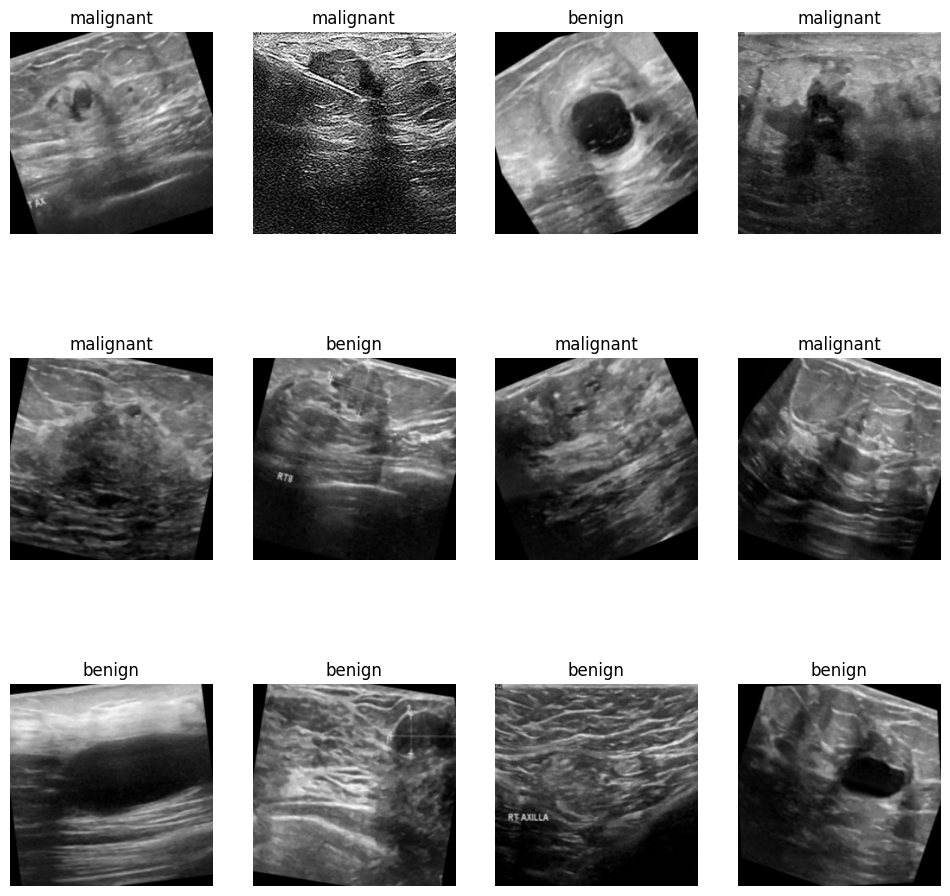

In [8]:
plt.figure(figsize=(12,12))
for images, labels in ds_train.take(1) :
    for i in range(12) :
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis(False)

In [18]:
def train_test_split(ds,val_size=0.5,test_size=0.5) :
    valid_len=int(val_size*len(ds))
    valid_ds=ds.take(valid_len)
    test_ds=ds.skip(valid_len)
    
    return valid_ds,test_ds

In [19]:
valid_ds , test_ds=train_test_split(ds_val)

In [20]:
len(valid_ds)

14

In [23]:
len(test_ds)

15

In [28]:
ds_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Resacling and Resizing

In [22]:
from tensorflow import keras
resize_rescale=keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

## Model building

In [37]:
model=models.Sequential([
    resize_rescale,
    layers.Conv2D(32,3,activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1,activation="sigmoid")
    
])
model.build(input_shape=(32,256,256,3))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 62, 62, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (32, 123008)             

In [39]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [40]:
history=model.fit(
    ds_train,
    epochs=15,
    batch_size=32,
    verbose=1,
    validation_data=valid_ds
)

Epoch 1/15
254/254 [==============================] - 386s 2s/step - loss: 0.5550 - accuracy: 0.7310 - val_loss: 0.4461 - val_accuracy: 0.8348
Epoch 2/15
254/254 [==============================] - 314s 1s/step - loss: 0.2973 - accuracy: 0.8701 - val_loss: 0.5023 - val_accuracy: 0.8326
Epoch 3/15
254/254 [==============================] - 300s 1s/step - loss: 0.1784 - accuracy: 0.9263 - val_loss: 0.5127 - val_accuracy: 0.8281
Epoch 4/15
254/254 [==============================] - 312s 1s/step - loss: 0.1157 - accuracy: 0.9575 - val_loss: 0.8201 - val_accuracy: 0.7902
Epoch 5/15
254/254 [==============================] - 307s 1s/step - loss: 0.0891 - accuracy: 0.9641 - val_loss: 0.7096 - val_accuracy: 0.7924
Epoch 6/15
254/254 [==============================] - 302s 1s/step - loss: 0.0666 - accuracy: 0.9739 - val_loss: 0.8092 - val_accuracy: 0.8214
Epoch 7/15
254/254 [==============================] - 313s 1s/step - loss: 0.0584 - accuracy: 0.9771 - val_loss: 1.2110 - val_accuracy: 0.7812

In [41]:
model.evaluate(test_ds)

15/15 [==============================] - 11s 377ms/step - loss: 1.0729 - accuracy: 0.7898


[1.072927713394165, 0.7898229956626892]

In [42]:
from keras.models import load_model
model.save("breast_cancer_prediction.h5")